In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from vecstack import stacking

In [5]:
df = pd.read_csv('../data/winequality-red.csv')

X = df[df.columns[1:-1]]
y = df['fixed acidity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [9]:
modelos = [
    RandomForestRegressor(n_estimators=50, random_state=123),
    AdaBoostRegressor(n_estimators=50, random_state=123),
    XGBRegressor(n_estimators=50, random_state=123)
]

errores = []

for model in modelos:
    model.fit(X_train, y_train)
    errores.append(mean_squared_error(y_test, model.predict(X_test)))

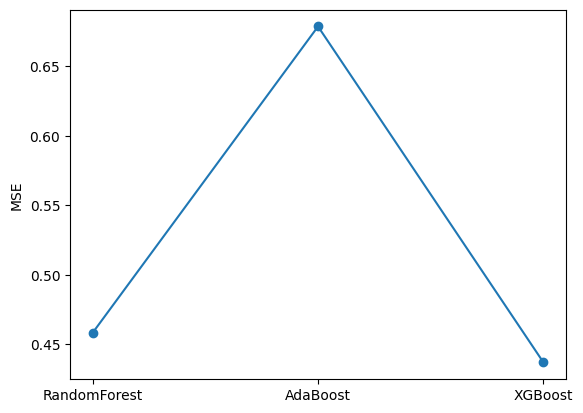

In [13]:
plt.plot(range(len(errores)), errores, marker='o')
plt.xticks(range(len(errores)), labels=['RandomForest', 'AdaBoost', 'XGBoost'])
plt.ylabel('MSE')
plt.show()

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150])

In [16]:
num_estimators = np.arange(10, 160, 10)

train_mse = []
test_mse = []
for n in num_estimators:
    xgb = XGBRegressor(n_estimators=n, random_state=123)
    xgb.fit(X_train, y_train)
    train_mse.append(mean_squared_error(y_train, xgb.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, xgb.predict(X_test)))

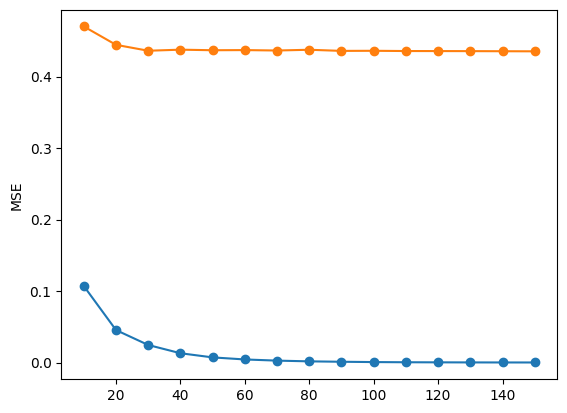

In [20]:
plt.plot(num_estimators, train_mse, marker='o', label='train')
plt.plot(num_estimators, test_mse, marker='o', label='test')
plt.ylabel('MSE')
plt.show()

In [22]:
stacked_models = [RandomForestRegressor(n_estimators=50, random_state=123), AdaBoostRegressor(n_estimators=50, random_state=123)]

stack_train, stack_test = stacking(stacked_models, X_train, y_train, X_test, regression=True,
                                   mode='oof_pred_bag', metric=mean_squared_error, n_folds=5, stratified=True,
                                   shuffle=True, random_state=123, verbose=2)

final_model = XGBRegressor(random_state=123, n_jobs=-1, n_estimators=10, max_depth=3)
final_model_fit = final_model.fit(stack_train, y_train)

stacked_pred = final_model.predict(stack_test)

print(f"Final prediction mse: {mean_squared_error(y_test, stacked_pred)}")

/Users/carlos/handbook/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/carlos/handbook/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/carlos/handbook/.venv/lib/python3.12/site-packages/vecstack/core.py:461: UserWarning: This is regression task hence classification-specific parameters set to <True> were ignored: <stratified>
  warnings.warn(warn_str, UserWarning)


task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [RandomForestRegressor]
    fold  0:  [0.33752641]
    fold  1:  [0.32344095]
    fold  2:  [0.35190777]
    fold  3:  [0.44856736]
    fold  4:  [0.41601725]
    ----
    MEAN:     [0.37549195] + [0.04835125]
    FULL:     [0.37545815]

model  1:     [AdaBoostRegressor]
    fold  0:  [0.66287955]
    fold  1:  [0.58948993]
    fold  2:  [0.59891542]
    fold  3:  [0.65759500]
    fold  4:  [0.65790821]
    ----
    MEAN:     [0.63335762] + [0.03216323]
    FULL:     [0.63333714]

Final prediction mse: 0.49217892957415116


In [23]:
errores.append(mean_squared_error(y_test, stacked_pred))

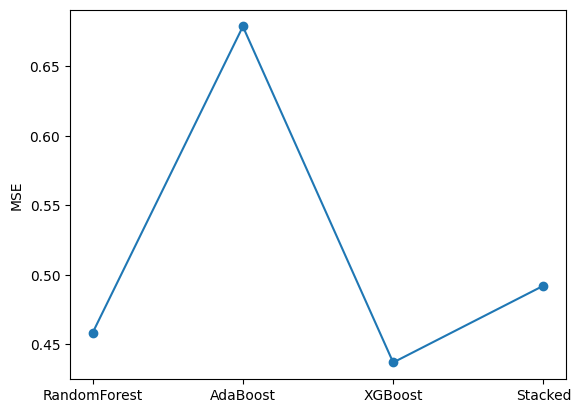

In [24]:
plt.plot(range(len(errores)), errores, marker='o')
plt.xticks(range(len(errores)), labels=['RandomForest', 'AdaBoost', 'XGBoost', 'Stacked'])
plt.ylabel('MSE')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression

In [31]:
stacked_models = [RandomForestRegressor(n_estimators=50, random_state=123), XGBRegressor(random_state=123, n_jobs=-1, n_estimators=50)]

stack_train, stack_test = stacking(stacked_models, X_train, y_train, X_test, regression=True,
                                   mode='oof_pred_bag', metric=mean_squared_error, n_folds=5, stratified=True,
                                   shuffle=True, random_state=123, verbose=2)

# final_model = XGBRegressor(random_state=123, n_jobs=-1, n_estimators=50)
final_model = LinearRegression()
final_model_fit = final_model.fit(stack_train, y_train)

stacked_pred = final_model.predict(stack_test)

print(f"Final prediction mse: {mean_squared_error(y_test, stacked_pred)}")

/Users/carlos/handbook/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/carlos/handbook/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/carlos/handbook/.venv/lib/python3.12/site-packages/vecstack/core.py:461: UserWarning: This is regression task hence classification-specific parameters set to <True> were ignored: <stratified>
  warnings.warn(warn_str, UserWarning)


task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [RandomForestRegressor]
    fold  0:  [0.33752641]
    fold  1:  [0.32344095]
    fold  2:  [0.35190777]
    fold  3:  [0.44856736]
    fold  4:  [0.41601725]
    ----
    MEAN:     [0.37549195] + [0.04835125]
    FULL:     [0.37545815]

model  1:     [XGBRegressor]
    fold  0:  [0.31166331]
    fold  1:  [0.36914099]
    fold  2:  [0.34203543]
    fold  3:  [0.36412109]
    fold  4:  [0.37903190]
    ----
    MEAN:     [0.35319854] + [0.02404420]
    FULL:     [0.35317700]

Final prediction mse: 0.4190593655317892


In [32]:
errores.append(mean_squared_error(y_test, stacked_pred))

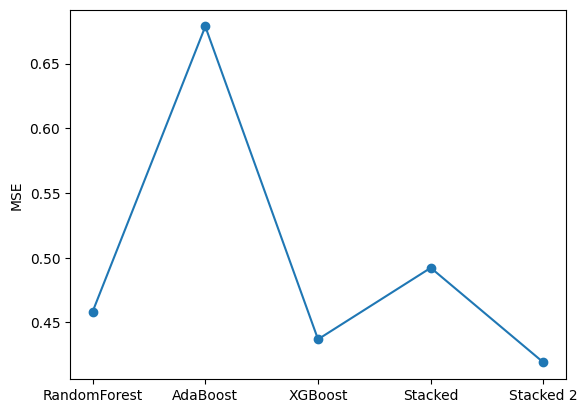

In [33]:
plt.plot(range(len(errores)), errores, marker='o')
plt.xticks(range(len(errores)), labels=['RandomForest', 'AdaBoost', 'XGBoost', 'Stacked', 'Stacked 2'])
plt.ylabel('MSE')
plt.show()